In [72]:
import pandas as pd
df = pd.read_csv('housewarming2.csv')

In [73]:
#데이터 앞부분 확인
df.head()

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,4200,5610,75,26,12,https://ohou.se/projects/126600/detail?affect_...
2,2,2022-10-07,취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,0,4214,201,60,15,https://ohou.se/projects/123056/detail?affect_...
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,5500,37375,643,169,122,https://ohou.se/projects/116945/detail?affect_...
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,9500,3760,73,13,9,https://ohou.se/projects/127436/detail?affect_...


In [74]:
#4900행, 16열
df.shape

(4900, 16)

# ** 인테리어 스타일 별로 집들이 제목에 많이 나타나는 키워드가 있을 것이다**

## - 제목 텍스트 분석 → 워드클라우드로 시각화

In [75]:
# 제목만 추출
# df.sort_values(by='제목',ascending = False).groupby('Unnamed:0').head(300)
# df.loc[행 인덱싱 값, 열 인덱싱 값]
df.loc[:,'제목']

#text로 네이밍
text = df.loc[:,'제목']

In [76]:
text.head()

0    서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈
1    구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집
2      취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방
3     손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링
4    아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈
Name: 제목, dtype: object

----
## 1) Okt로 분석

In [77]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import nltk
nltk.download('punkt')

# 기본 패키지 불러오기
import matplotlib.pyplot as plt

# 자연어 처리 패키지 불러오기 
# Natural Language Toolkit 또는 보다 일반적으로 NLTK는 Python 프로그래밍 언어로 작성된 영어의 기호 및 통계 자연 언어 처리를위한 라이브러리
import nltk  

# 파이썬 한국어 자연어 처리 패키지, 모듈 불러오기
# 형태소 분석기는 Okt(Open Korea Text), Mecab(메캅), Komoran(코모란), Hannanum(한나눔), 꼬꼬마(Kkma)
from konlpy.tag import Kkma 
from konlpy.tag import Okt # KoNLPy패키지에는 Hannanum, Kkma, Komoran, Mecab, Okt(Twitter)등의 클래스=형태소분석기 들이 있습니다

# 워드클라우드 그리는 패키지, 모듈 불러오기
from wordcloud import WordCloud

# 참고 서적 : 왕초보를 위한 Python: [쉽게 풀어 쓴 기초 문법과 실습](https://wikidocs.net/77)

[nltk_data] Downloading package punkt to /Users/kimye/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
sentences_tag = []

In [79]:
text.to_csv('titlef.csv')
text = open('titlef.csv').read()

🆘⬆️sentences_tag = okt.pos(text)시, AssertionError: phrase input should be string, not <class 'pandas.core.frame.DataFrame'> 에러가 떠서 새로 파일 만들어 준 후, 실행
    혹시 해결 방법을 알고 있는 분들이 계시다면.. 공유해주세요.

In [80]:
okt = Okt()
sentences_tag = okt.pos(text)

In [81]:
#명사, 형용사 한번에 추출
noun_adj_list = []

In [82]:
for word, tag in sentences_tag:
    if tag in ['Noun','adjective']:
        noun_adj_list.append(word)

In [90]:
# noun_adj = ' '.join(s for s in noun_adj_list)
# print(noun_adj)

In [68]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#불용어 정의
stop_words = "집 리 빈티 일링 세 것 살 홈스 위 더 스타 법"
stop_words = stop_words.split(' ')

word_tokens = word_tokenize(noun_adj)
result = []

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
# print(word_tokens)
# print(result)

In [83]:
#개수 카운트, 가장 흔한 500개 추출
counts = Counter(noun_adj_list)
tags = counts.most_common(500)

In [84]:
print(tags)

[('집', 1393), ('평', 736), ('신혼집', 544), ('아파트', 473), ('공간', 460), ('화이트', 416), ('하우스', 386), ('주택', 337), ('우리', 305), ('모델링', 301), ('인테리어', 298), ('리', 281), ('취향', 267), ('우드', 259), ('방', 236), ('나', 234), ('부부', 233), ('홈', 210), ('모던', 192), ('구축', 181), ('디자이너', 178), ('빈티', 162), ('셀프', 162), ('미니', 159), ('일링', 150), ('가구', 150), ('원룸', 145), ('감성', 145), ('내', 145), ('완성', 140), ('가족', 140), ('아이', 138), ('톤', 136), ('가득', 134), ('시공', 132), ('포인트', 121), ('라이프', 117), ('속', 117), ('오피스텔', 116), ('소품', 115), ('카페', 113), ('첫', 110), ('식물', 110), ('채운', 109), ('살', 108), ('것', 107), ('자취', 106), ('로망', 102), ('수', 100), ('복층', 96), ('뷰', 91), ('거실', 87), ('컬러', 86), ('층', 85), ('홈스', 80), ('세', 80), ('위', 79), ('생활', 78), ('더', 74), ('내추럴', 73), ('스타', 73), ('자연', 73), ('주방', 73), ('변신', 73), ('매력', 70), ('두', 69), ('무드', 68), ('변화', 68), ('매일', 68), ('수납', 68), ('심플', 67), ('맥시멀', 67), ('법', 64), ('숲', 63), ('캠핑', 63), ('행복', 62), ('리스트', 61), ('햇살', 61), ('일상', 61), ('싱글',

### 워드클라우드 만들기

In [85]:
from wordcloud import WordCloud

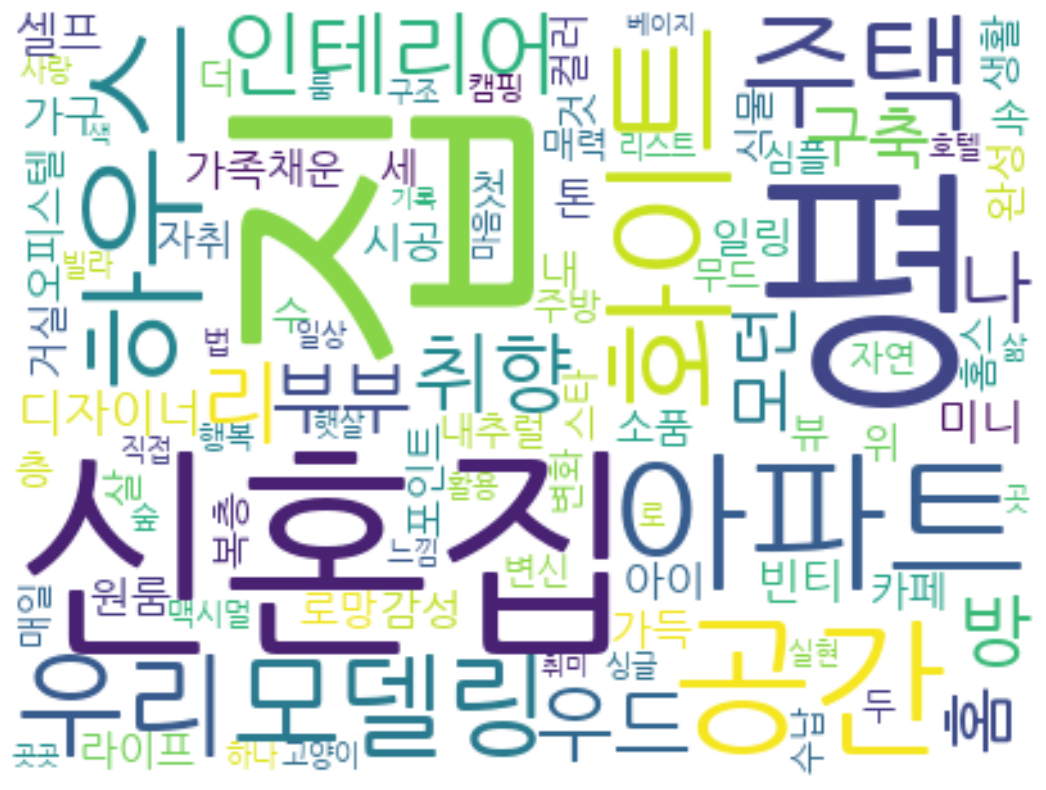

In [89]:
wc = WordCloud(
font_path = 'NanumGothic.ttf',
background_color = 'white',
max_words = 100, #시각화할 단어 개수 
width = 400,
height = 300)

wc = wc.generate_from_frequencies(dict(tags))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

---

## 2) 강사님 설명대로 분석(kiwi)

In [175]:
#키위 불러오기
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [176]:
text = open('titlef.csv').read()
result = kiwi.tokenize(text)
result

[Token(form=',', tag='SP', start=0, len=1),
 Token(form='제목', tag='NNG', start=1, len=2),
 Token(form='0', tag='SN', start=4, len=1),
 Token(form=',', tag='SP', start=5, len=1),
 Token(form='서재형', tag='NNP', start=6, len=3),
 Token(form='거실', tag='NNG', start=10, len=2),
 Token(form='부터', tag='JX', start=12, len=2),
 Token(form='베란다', tag='NNG', start=15, len=3),
 Token(form='아뜰리', tag='NNG', start=19, len=3),
 Token(form='에', tag='JKB', start=22, len=1),
 Token(form='까지', tag='JX', start=23, len=2),
 Token(form='!', tag='SF', start=25, len=1),
 Token(form='센스', tag='NNG', start=27, len=2),
 Token(form='만점', tag='NNG', start=29, len=2),
 Token(form='오베네홈', tag='NNG', start=32, len=4),
 Token(form='1', tag='SN', start=37, len=1),
 Token(form=',', tag='SP', start=38, len=1),
 Token(form='"', tag='SSO', start=39, len=1),
 Token(form='구축', tag='NNG', start=40, len=2),
 Token(form='2', tag='SN', start=43, len=1),
 Token(form='Bay', tag='SL', start=44, len=3),
 Token(form='리모델링', tag='NNG', 

In [178]:
#키위에서 명사 + 형용사 + 동사 + 이모티콘 추출
def extract_noun_adj(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG','NNP','VA','VV','SH']:
            yield token.form

In [179]:
list(extract_noun_adj(text))

['제목',
 '서재형',
 '거실',
 '베란다',
 '아뜰리',
 '센스',
 '만점',
 '오베네홈',
 '구축',
 '리모델링',
 '바이블',
 '모던',
 '신혼',
 '집',
 '취향',
 '읽',
 '쓰',
 '비밀',
 '서재',
 '방',
 '손',
 '닿',
 '녹음',
 '🌳',
 '층집',
 '리모델링',
 '편안',
 '무드',
 '빈티지',
 '스푼',
 '하',
 '내추럴',
 '홈',
 '게으르',
 '집',
 '순이',
 '하루',
 '보내',
 '복층',
 '오피스텔',
 '사계절',
 '품',
 '액자',
 '창',
 '포인트',
 '따뜻하',
 '무드',
 '신혼',
 '집',
 '숨기',
 '아기',
 '하',
 '베이지',
 '하우스',
 '집',
 '새집',
 '달',
 '🏘',
 '살',
 '집',
 '리모델링',
 '집',
 '자취',
 '하',
 '퇴근',
 '후',
 '삶',
 '행복',
 '💗',
 '페트롤',
 '블루',
 '분할',
 '쪼개',
 '나누',
 '아늑하',
 '공간',
 '연출',
 '감쪽같',
 '매트',
 '화이트',
 '앤',
 '우드',
 '컨셉',
 '아파트',
 '디자이너',
 '부부',
 '우드',
 '하우스',
 '모노',
 '톤',
 '방안',
 '담기',
 '작',
 '변화',
 '신축',
 '커플',
 '신혼',
 '집',
 '좋아하',
 '채우',
 '음악',
 '프로듀서',
 '빈티지',
 '하우스',
 '넓',
 '집',
 '넓',
 '간살',
 '도어',
 '정갈하',
 '꾸미',
 '우드',
 '하우스',
 '외향',
 '계획',
 '부부',
 '갤러리',
 '같',
 '신혼',
 '집',
 '좋아하',
 '채우',
 '완성',
 '온라인',
 '자취방',
 '꿈꾸',
 '집',
 '스타일링',
 '변화',
 '기록',
 '다이닝',
 '룸',
 '서재',
 '품',
 '아파트',
 '작',
 '야무지',
 '집',
 '원룸',
 '살',
 '오렌지',
 '그린'

⬆️ 위, 시, 리스트 이렇게 되어 있는데 고유명사 지정해줘야 할듯

In [180]:
#불용어 제거 (txt파일로)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example = list(extract_noun_adj(text))
s_file_name = open('StopWords.txt','r',encoding='utf-8')

stop_words_list = []
for line in s_file_name.readlines():
    stop_words_list.append(line.rstrip())
    
s_file_name.close()

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
max_features = 500, #최대 단어 수(빈도순) 
tokenizer=extract_noun_adj)

In [182]:
dtm = cv.fit_transform(df['제목'])

In [183]:
#단어 빈도 데이터 프레임
word_count = pd.DataFrame({
    '단어':cv.get_feature_names_out(),
    '빈도':dtm.sum(axis=0).flat
})

#빈도수 정렬
word_count.sort_values('빈도',ascending=False).head()

,단어,빈도
402,집,2082
278,신혼,596
296,아파트,472
29,공간,463
488,화이트,422


In [ ]:
#csv 파일로 저장
word_count.to_csv('kiwi_count.csv')

### 워드클라우드

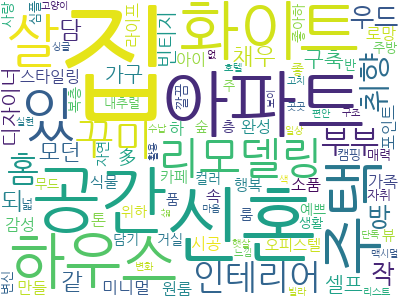

In [184]:
wc = WordCloud(
font_path = 'NanumGothic.ttf',
background_color = 'white',
max_words = 100,
width =400, 
height = 300)

#word_count를 사전(dict) 형태로 변환
count_dic = dict(zip(word_count.단어, word_count.빈도))

#단어 구름
cloud = wc.fit_words(count_dic)

cloud.to_image()

### 오늘의 집 style

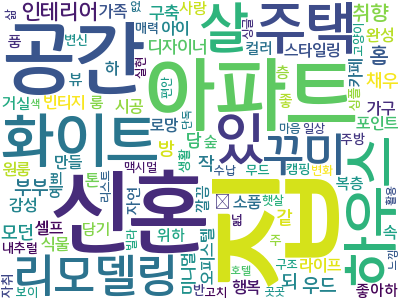

In [185]:
wc = WordCloud(
font_path = '잘풀리는하루 Medium.ttf',
background_color = 'white',
max_words = 100,
width =400, 
height = 300)

#word_count를 사전(dict) 형태로 변환
count_dic = dict(zip(word_count.단어, word_count.빈도))

#단어 구름
cloud = wc.fit_words(count_dic)

cloud.to_image()

In [187]:
from PIL import Image
import numpy as np

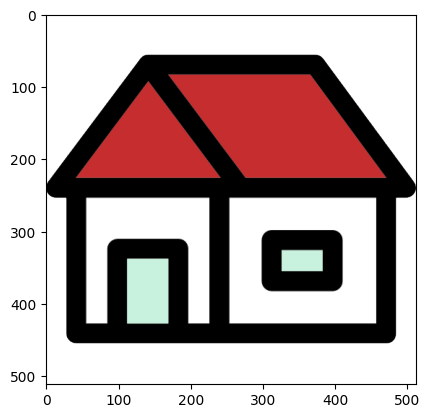

In [186]:
#아이콘이 될 이미지 불러오기
icon = Image.open('pngegg.png')
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

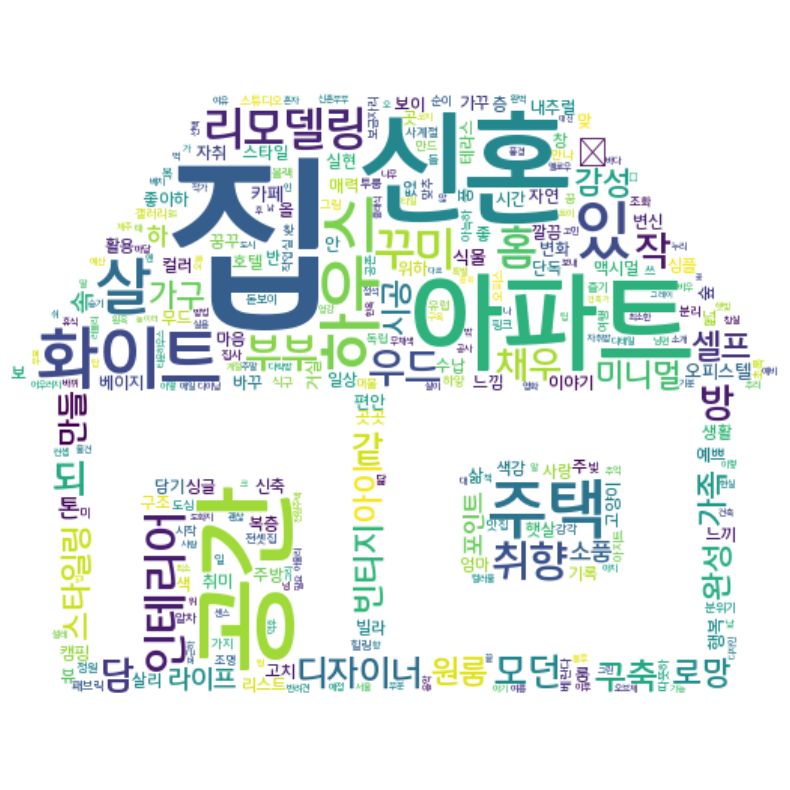

In [188]:
wc = WordCloud(
font_path='잘풀리는하루 Medium.ttf', #폰트
background_color = 'white', #배경색
max_words = 300, #단어개수
width = 400,height = 300,
mask = mask)

# #word_count를 사전(dict) 형태로 변환
count_dic = dict(zip(word_count.단어, word_count.빈도))
cloud = wc.generate_from_frequencies(count_dic)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cloud,interpolation="bilinear")

## 3) 불용어 리스트 빼고 dtm 만들기

okt로 진행

In [3]:
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
#키위 불러오기
from kiwipiepy import Kiwi
kiwi = Kiwi()

text = open('titlef.csv').read()

# #전체 토큰화
# result = kiwi.tokenize(text)

In [6]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords()

In [7]:
#키위에서 명사 + 형용사 + 동사 추출
def extract_noun_adj(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG','NNP','VA','VV']:
            yield token.form

In [8]:
stop_words = open('StopWords.txt')
word_tokens = extract_noun_adj(text)
result = []

for w in word_tokens:
    if w not in stop_words:
        result.append(w)

In [13]:
# result

In [10]:
#개수 카운트, 가장 흔한 500개 추출
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
counts = Counter(result)
tags = counts.most_common(500)

In [11]:
print(tags)

[('집', 2067), ('신혼', 595), ('아파트', 472), ('공간', 463), ('화이트', 420), ('하우스', 394), ('주택', 392), ('있', 359), ('살', 354), ('리모델링', 301), ('꾸미', 298), ('인테리어', 297), ('홈', 296), ('취향', 265), ('부부', 251), ('우드', 239), ('작', 221), ('방', 218), ('담', 208), ('되', 207), ('채우', 196), ('같', 195), ('모던', 192), ('구축', 181), ('디자이너', 181), ('빈티지', 162), ('셀프', 162), ('스타일링', 150), ('미니멀', 150), ('가구', 150), ('로망', 147), ('원룸', 144), ('감성', 144), ('가족', 143), ('완성', 140), ('아이', 137), ('시공', 133), ('만들', 132), ('속', 128), ('하', 124), ('라이프', 122), ('포인트', 120), ('오피스텔', 116), ('소품', 116), ('행복', 115), ('톤', 114), ('카페', 114), ('식물', 110), ('룸', 96), ('위하', 91), ('예쁘', 89), ('좋아하', 88), ('복층', 87), ('품', 87), ('컬러', 86), ('거실', 85), ('담기', 82), ('좋', 80), ('자연', 79), ('사랑', 79), ('층', 78), ('깔끔', 75), ('주방', 74), ('숲', 74), ('뷰', 74), ('내추럴', 73), ('변신', 73), ('자취', 72), ('무드', 71), ('넓', 71), ('매력', 70), ('주', 69), ('캠핑', 69), ('생활', 68), ('심플', 68), ('변화', 67), ('맥시멀', 67), ('편안', 66), ('고치', 65), ('

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
max_features = 500, #최대 단어 수(빈도순) 
tokenizer=extract_noun_adj)

⬆️ 행렬을 만들기 전에... 불용어 처리를 하고 싶은데 어떻게 해야할지 모르겠음. 
지금 생각하기로는 def extract_noun_adj(text): 함수를 만들 때에 불용어 처리를 해야하는데.. 함수 아직 못 짜겠음..! ㅠㅅㅠ

In [44]:
# <아까워서 모아본 코드들>
# #불용어 제거
# stopwords = [].
# f = open('StopWords.txt')
# lines = f.readlines()
# for line in lines:
#     line = line.strip()
#     stopwords.append(line)
# f.close()
# print(stopwords)

# for i, document in enumerate(finaldata):
#     clean_words=[]
#     for word in nltk.tokenize.word_tokenize(document):
#         if word not in stopwords:
#             clean_words.append(word)
#     print(clean_words) 